In [2]:
!pip install -Uqq fastai duckduckgo_search

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
urls = search_images('crashed car photos', max_images=1)
urls[0]

Searching for 'crashed car photos'


'https://i2-prod.manchestereveningnews.co.uk/incoming/article10626038.ece/ALTERNATES/s810/12395587_10206992708250492_449174310_n.jpg'

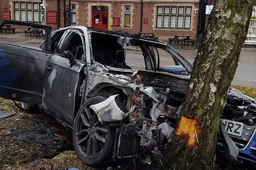

In [5]:
from fastdownload import download_url
dest = 'crashed_car.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'car photos'


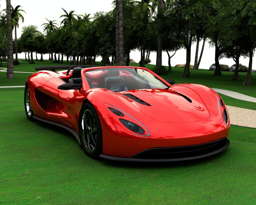

In [7]:
download_url(search_images('car photos', max_images=1)[0], 'car.jpg', show_progress=False)
Image.open('car.jpg').to_thumb(256,256)

In [8]:
searches = 'crashed car','car'
path = Path('crashed_car_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} bright photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'crashed car photo'
Searching for 'crashed car bright photo'
Searching for 'crashed car shade photo'
Searching for 'car photo'
Searching for 'car bright photo'
Searching for 'car shade photo'


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

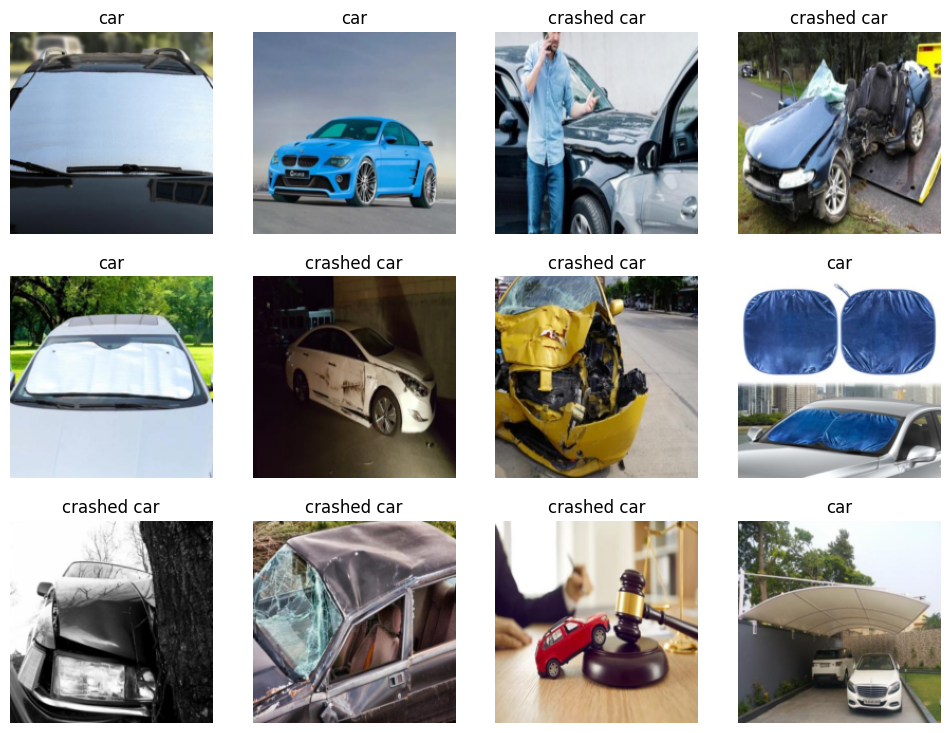

In [12]:
dls.show_batch(max_n=12)

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.128926,0.791416,0.272727,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.456195,0.271706,0.181818,00:12
1,0.345024,0.253898,0.090909,00:18
2,0.234281,0.343003,0.090909,00:17


In [14]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.038629,0.424659,0.090909,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.018043,0.452565,0.090909,00:17
1,0.023052,0.423445,0.090909,00:16
2,0.024230,0.542315,0.090909,00:14
3,0.020509,0.645784,0.090909,00:11
4,0.016493,0.666647,0.090909,00:10
5,0.013511,0.628409,0.090909,00:12


In [19]:
is_crashed_car,_,probs = learn.predict(PILImage.create('0b2d71ae-149c-427c-90eb-33beee1eed97.jpg'))
print(f"This is a: {is_crashed_car}.")
print(f"Probability it's a crashed car: {probs[1]:.4f}")
print(f"Probability it's not a crashed car: {probs[0]:.4f}")

This is a: car.
Probability it's a crashed car: 0.0001
Probability it's not a crashed car: 0.9999
